<a href="https://colab.research.google.com/github/SarahSouzaPontes/banco_Dos_Dados_18.05.2022_Pensionistas_Desigualdades/blob/main/Banco_Dos_Dados_18_05_2022_Pensionistas_Desigualdades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalação das bibliotecas importantes
!pip install update pip
!pip install pandas -q
!pip install numpy -q
!pip install sklearn -q
!pip install imblearn -q
!pip install statsmodels -q
!pip install yellowbrick -q
!pip uninstall pandas-profiling -y -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     |████████████████████████████████| 21.8 MB 1.4 MB/s 
     |████████████████████████████████| 11.1 MB 21.5 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 102 kB 58.1 MB/s 
     |████████████████████████████████| 690 kB 37.9 MB/s 
     |████████████████████████████████| 4.7 MB 60.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 61.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
'''Importação dos módulos e funções'''


import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import warnings
import seaborn as sns
import imblearn
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
import missingno as msno
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

'''
Carregando os arquivos .csv como panda dataframe
'''

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/br_me_pensionistas.csv',header = 0)

In [6]:
dataset

,ano,mes,nome_servidor,cpf_servidor,data_nascimento_servidor,data_falecimento_servidor,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,...,data_nascimento_beneficiario,sigla_uf_upag_vinculacao,tipo_beneficiario,tipo_pensao,natureza_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso
0,1994,10,CAMILO GOMES DA SILVA,***673711**,1914-07-14,1994-08-15,130000000065,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1914-12-14,DF,VIUVA,LEI 8112/90,VITALICIA,1994-08-15,NaN,401.06,401.06,NAO
1,1994,10,CARLOS IVAN VIEIRA,***110331**,1937-08-08,1994-04-04,130000000069,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1935-01-01,DF,VIUVA,LEI 8112/90,VITALICIA,1994-04-04,NaN,3566.22,2856.93,NAO
2,1994,10,JOAO ARAGAO FILHO,***999221**,1926-01-20,1994-03-11,130000000162,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1939-12-13,DF,VIUVA,LEI 8112/90,VITALICIA,1994-03-11,NaN,524.79,524.79,NAO
3,1994,10,MANOEL RODRIGUES MIRANDA,***463351**,1944-01-16,1994-05-17,130000000244,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1940-01-20,DF,VIUVA,LEI 8112/90,VITALICIA,1994-05-18,NaN,101.29,101.29,NAO
4,1994,10,MANOEL RODRIGUES MIRANDA,***463351**,1944-01-16,1994-05-17,130000000244,MINIST. AGRICULTURA E REFORMA AGRARIA,MA,0,...,1980-05-17,DF,FILHO,LEI 8112/90,TEMPORARIA,1994-05-17,2001-05-17,101.29,101.29,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309998,1994,12,MAXIMIANO JOSE DE FREITAS,NaN,1880-03-21,1969-02-08,250001077381,MINISTERIO DA SAUDE,MS,0,...,1911-11-27,DF,FILHA MAIOR SOLTEIRA SEM CARGO PUBLICO PERMANENTE,LEI 3373/58,TEMPORARIA,1969-02-08,NaN,685.95,685.95,NAO
309999,1994,12,JOSE FREIRE TAVORA,***971682**,1934-11-06,1983-10-25,250001077384,MINISTERIO DA SAUDE,MS,0,...,1939-05-14,DF,VIUVA,LEI 3373/58,VITALICIA,1983-11-25,NaN,483.36,483.36,NAO
310000,1994,12,JOSE FREIRE TAVORA,***971682**,1934-11-06,1983-10-25,250001077384,MINISTERIO DA SAUDE,MS,0,...,1975-04-22,DF,FILHA MAIOR SOLTEIRA SEM CARGO PUBLICO PERMANENTE,LEI 3373/58,TEMPORARIA,1983-11-25,NaN,483.36,483.36,NAO
310001,1994,12,FATIMA DAS NEVES CINELLI,***766727**,1946-12-26,1991-12-26,250001077388,MINISTERIO DA SAUDE,MS,0,...,1974-02-16,RJ,FILHA,LEI 8112/90,TEMPORARIA,1991-12-27,1995-02-16,1537.3,1506.23,NAO


In [7]:
dataset.describe()

,ano,mes,nome_servidor,cpf_servidor,data_nascimento_servidor,data_falecimento_servidor,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,...,data_nascimento_beneficiario,sigla_uf_upag_vinculacao,tipo_beneficiario,tipo_pensao,natureza_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso
count,310003,310003,277142,119471,186590,273737,310003,310003,310003,310003,...,297197,277142,277160,309466,309466,280789,22318,310003.0,310003.0,310003
unique,3,4,58519,25373,16750,15423,74796,16,16,6,...,28321,27,42,23,3,14144,3919,56439.0,56922.0,3
top,1994,12,JOSE DOS SANTOS,***000001**,1933-03-03,1991-12-01,170001290557,MINISTERIO DA FAZENDA,MF,0,...,1930-01-01,RJ,VIUVA,LEI 3373/58 COMBINADA COM 6782/80,VITALICIA,1980-05-20,1998-12-01,0.0,0.0,NAO
freq,211699,211699,144,63,987,219,18009,74733,74733,201244,...,342,72901,138744,128890,158985,10806,26,1599.0,1605.0,307479


In [8]:
dataset.shape

(310003, 30)

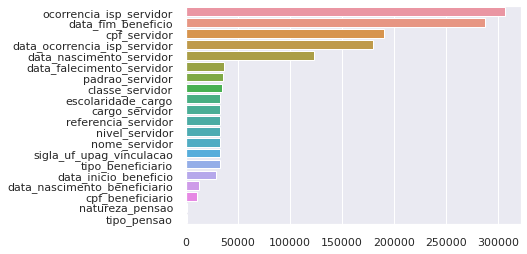

In [9]:
''' Verificando as colunas que mais possuem valores NaN '''
X=dataset.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)


In [10]:
#Todas variáveis do dataset
list(dataset)

['ano',
 'mes',
 'nome_servidor',
 'cpf_servidor',
 'data_nascimento_servidor',
 'data_falecimento_servidor',
 'matricula_servidor',
 'nome_orgao',
 'sigla_orgao',
 'codigo_orgao_superior',
 'cargo_servidor',
 'escolaridade_cargo',
 'classe_servidor',
 'padrao_servidor',
 'referencia_servidor',
 'nivel_servidor',
 'ocorrencia_isp_servidor',
 'data_ocorrencia_isp_servidor',
 'nome_beneficiario',
 'cpf_beneficiario',
 'data_nascimento_beneficiario',
 'sigla_uf_upag_vinculacao',
 'tipo_beneficiario',
 'tipo_pensao',
 'natureza_pensao',
 'data_inicio_beneficio',
 'data_fim_beneficio',
 'rendimento_bruto',
 'rendimento_liquido',
 'pagamento_suspenso']

In [11]:
'''Reduzindo a tabela '''
dataset2 = dataset.loc[:, dataset.columns.isin(['data_nascimento_servidor','data_falecimento_servidor','tipo_beneficiario','tipo_pensao','data_inicio_beneficio','data_fim_beneficio', 'escolaridade_cargo','rendimento_bruto',
 'rendimento_liquido','pagamento_suspenso'])]

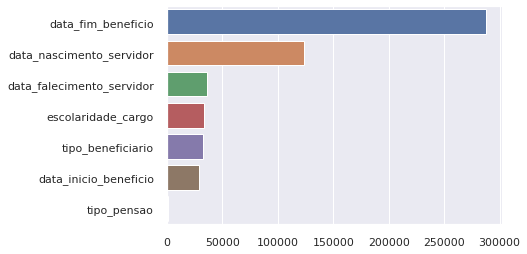

In [12]:
X=dataset2.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)

In [13]:
#Calculando a idade
'''data_e_hora = datetime.strptime(data_em_texto, ‘%d/%m/%Y %H:%M’)'''
def convert_data(data_nascimento, data_falecimento):
    if pd.isna(data_nascimento) or pd.isna(data_falecimento):
      return np.nan
    else: 
        dt_nasc = datetime.datetime.strptime(data_nascimento, '%Y-%m-%d')
        dt_falec = datetime.datetime.strptime(data_falecimento, '%Y-%m-%d')
        anos = (dt_falec - dt_nasc).days/365.2425
        return round(anos,0)
    

def func(x):
    return convert_data(x['data_nascimento_servidor'], x['data_falecimento_servidor'])

def func2(x):
  return convert_data(x['data_inicio_beneficio'], x['data_fim_beneficio'])

In [14]:
dataset2.drop(dataset2.loc[dataset2['data_nascimento_servidor'] == 'data_nascimento_servidor'].index, inplace=True)
dataset2.reset_index(drop=True, inplace = True)

In [15]:
mode=dataset2["data_nascimento_servidor"].mode()

In [16]:
dataset2["data_nascimento_servidor"].fillna(mode[0], inplace = True)

In [17]:
dataset2['idade_servidor']=dataset2.apply(func, axis = 1)

In [18]:
dataset2['idade_servidor'].describe()

count    273734.000000
mean         56.360938
std          15.332014
min         -28.000000
25%          47.000000
50%          56.000000
75%          67.000000
max         180.000000
Name: idade_servidor, dtype: float64

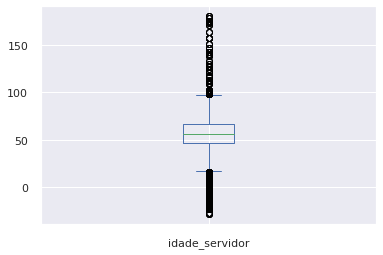

In [19]:
dataset2['idade_servidor'].plot.box()

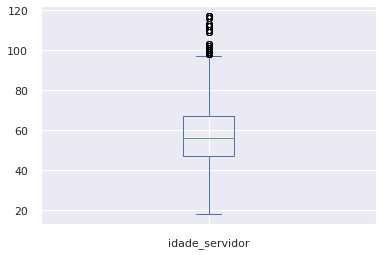

In [20]:
#removendo outliers 
dataset2.drop(dataset2.loc[dataset2['idade_servidor'] > 120].index, inplace=True)
dataset2.drop(dataset2.loc[dataset2['idade_servidor'] < 18].index, inplace=True)
dataset2.reset_index(drop=True,inplace = True)
dataset2['idade_servidor'].plot.box()


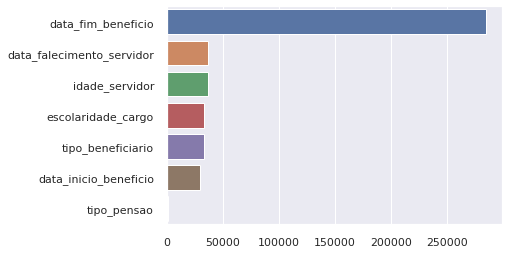

In [21]:
X=dataset2.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)

In [22]:
dataset2.isnull().values.any() 

True

In [23]:
dataset2.isnull()

,data_nascimento_servidor,data_falecimento_servidor,escolaridade_cargo,tipo_beneficiario,tipo_pensao,data_inicio_beneficio,data_fim_beneficio,rendimento_bruto,rendimento_liquido,pagamento_suspenso,idade_servidor
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
306841,False,False,False,False,False,False,True,False,False,False,False
306842,False,False,False,False,False,False,True,False,False,False,False
306843,False,False,False,False,False,False,True,False,False,False,False
306844,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#Criar variável data atual 
dataAtual = datetime.date.today()
datastr = dataAtual.strftime('%Y-%m-%d')

In [25]:
dataset2['data_fim_beneficio'].fillna( datastr, inplace = True)

In [26]:
dataset2['tempo_beneficio']=dataset2.apply(func2, axis = 1)

In [27]:
dataset2['tempo_beneficio'].describe()

count    277632.000000
mean         39.287924
std          13.887536
min        -193.000000
25%          32.000000
50%          39.000000
75%          47.000000
max         128.000000
Name: tempo_beneficio, dtype: float64

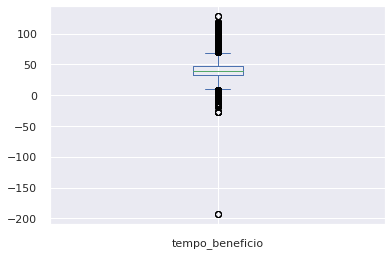

In [28]:
dataset2['tempo_beneficio'].plot.box()

In [29]:
dataset2.drop(dataset2.loc[dataset2['tempo_beneficio'] < 0].index, inplace=True)
dataset2.reset_index(drop=True, inplace = True)

In [30]:
#Características do beneficiário
dataset2.tipo_beneficiario.value_counts()

VIUVA                                                 137788
FILHA MAIOR SOLTEIRA SEM CARGO PUBLICO PERMANENTE      86187
FILHO                                                  10171
FILHA                                                   9545
COMPANHEIRA(O)                                          7559
FILHO MAIOR INVALIDO                                    3995
VIUVO                                                   2611
COMPANHEIRA/EX-COMPANHEIRA PA RECONHECIDA JUDICIAL      2422
COMPANHEIRO(A) DESIGNADO                                1875
MENOR DE 21 ANOS SOB GUARDA OU TUTELA                   1857
FILHA MAIOR INVALIDA                                    1735
MAE                                                     1258
CONJUGE SEPARAD0 JUDICIALMENTE                          1213
VIUVA INVALIDA                                          1137
CONJUGE DIVORCIADO                                       644
DESIGNADO MENOR 21 ANOS DEPENDENCIA ECONO.SERVIDOR       557
IRMA SOLTEIRA           

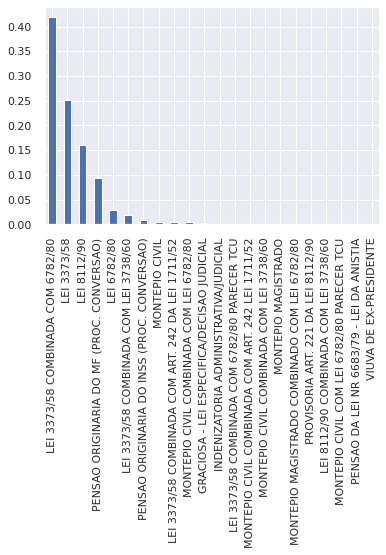

In [31]:
#Tipos, causas, motivações do benefício

dataset2['tipo_pensao'].value_counts(normalize=True).plot.bar()

In [32]:
dataset2.info()
dataset2['data_nascimento_servidor']=pd.to_datetime(dataset2['data_nascimento_servidor'])
dataset2['data_falecimento_servidor']=pd.to_datetime(dataset2['data_falecimento_servidor'])
dataset2['data_inicio_beneficio']=pd.to_datetime(dataset2['data_inicio_beneficio'])
dataset2['data_nascimento_servidor']=pd.to_datetime(dataset2['data_nascimento_servidor'])
dataset2["rendimento_bruto"] = pd.to_numeric(dataset2["rendimento_bruto"], downcast="float")
dataset2["rendimento_liquido"] = pd.to_numeric(dataset2["rendimento_liquido"], downcast="float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306788 entries, 0 to 306787
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data_nascimento_servidor   306788 non-null  object 
 1   data_falecimento_servidor  270522 non-null  object 
 2   escolaridade_cargo         273912 non-null  object 
 3   tipo_beneficiario          273945 non-null  object 
 4   tipo_pensao                306251 non-null  object 
 5   data_inicio_beneficio      277574 non-null  object 
 6   data_fim_beneficio         306788 non-null  object 
 7   rendimento_bruto           306788 non-null  object 
 8   rendimento_liquido         306788 non-null  object 
 9   pagamento_suspenso         306788 non-null  object 
 10  idade_servidor             270522 non-null  float64
 11  tempo_beneficio            277574 non-null  float64
dtypes: float64(2), object(10)
memory usage: 28.1+ MB


In [33]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306788 entries, 0 to 306787
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   data_nascimento_servidor   306788 non-null  datetime64[ns]
 1   data_falecimento_servidor  270522 non-null  datetime64[ns]
 2   escolaridade_cargo         273912 non-null  object        
 3   tipo_beneficiario          273945 non-null  object        
 4   tipo_pensao                306251 non-null  object        
 5   data_inicio_beneficio      277574 non-null  datetime64[ns]
 6   data_fim_beneficio         306788 non-null  object        
 7   rendimento_bruto           306788 non-null  float32       
 8   rendimento_liquido         306788 non-null  float32       
 9   pagamento_suspenso         306788 non-null  object        
 10  idade_servidor             270522 non-null  float64       
 11  tempo_beneficio            277574 non-null  float64 

In [34]:
#Agrupamento de benefício bruto por ano da data_inicio_beneficio
agrup_ano_bruto = dataset2.groupby(dataset2["data_inicio_beneficio"].dt.year)["rendimento_bruto"].sum()

In [35]:
#Renomeando Variáveis do Dataset
#dataset2.rename(columns{x:y, z:a})

In [36]:
'''Distribuição normalizada da variável X'''
#sns.distplot(dataset2.X, fit = stats.norm);

'Distribuição normalizada da variável X'

In [37]:
'''Reduzindo a tabela '''
dataset3 = dataset2.loc[:, dataset2.columns.isin(['rendimento_bruto', 'idade_servidor' , 'escolaridade_cargo'])]

In [38]:
dataset3=pd.get_dummies(dataset3)
dataset3

,rendimento_bruto,idade_servidor,escolaridade_cargo_NIVEL AUXILIAR,escolaridade_cargo_NIVEL INTERMEDIARIO,escolaridade_cargo_NIVEL SUPERIOR,escolaridade_cargo_NM
0,401.059998,80.0,0,1,0,0
1,3566.219971,57.0,0,0,1,0
2,524.789978,68.0,0,1,0,0
3,101.290001,50.0,0,1,0,0
4,101.290001,50.0,0,1,0,0
...,...,...,...,...,...,...
306783,685.950012,89.0,0,1,0,0
306784,483.359985,49.0,0,1,0,0
306785,483.359985,49.0,0,1,0,0
306786,1537.300049,45.0,0,1,0,0


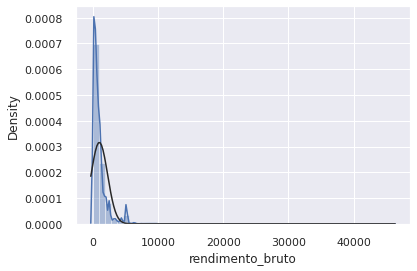

In [44]:
'''Distribuição normalizada de rendimento_bruto'''
sns.distplot(dataset3.rendimento_bruto, fit = stats.norm);

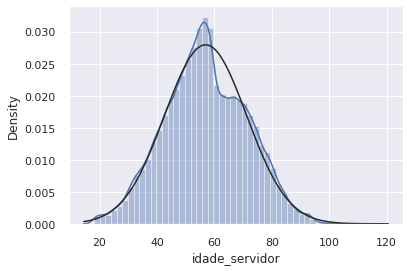

In [45]:
'''Distribuição normalizada de idade_servidor'''
sns.distplot(dataset3.idade_servidor, fit = stats.norm);

In [46]:
'''Distribuição normalizada de idade_servidor'''
sns.distplot(dataset3.escolaridade_cargo, fit = stats.norm);

AttributeError: ignored

In [39]:
##Há correlação entre valor da pensão, idade do trabalhador e escolaridade?
dataset3.corr()

,rendimento_bruto,idade_servidor,escolaridade_cargo_NIVEL AUXILIAR,escolaridade_cargo_NIVEL INTERMEDIARIO,escolaridade_cargo_NIVEL SUPERIOR,escolaridade_cargo_NM
rendimento_bruto,1.000000,0.100659,-0.184120,-0.264100,0.549265,-0.013497
idade_servidor,0.100659,1.000000,-0.037825,-0.040158,0.072562,0.002731
escolaridade_cargo_NIVEL AUXILIAR,-0.184120,-0.037825,1.000000,-0.351512,-0.156444,-0.071562
escolaridade_cargo_NIVEL INTERMEDIARIO,-0.264100,-0.040158,-0.351512,1.000000,-0.555741,-0.254211
escolaridade_cargo_NIVEL SUPERIOR,0.549265,0.072562,-0.156444,-0.555741,1.000000,-0.113140
escolaridade_cargo_NM,-0.013497,0.002731,-0.071562,-0.254211,-0.113140,1.000000


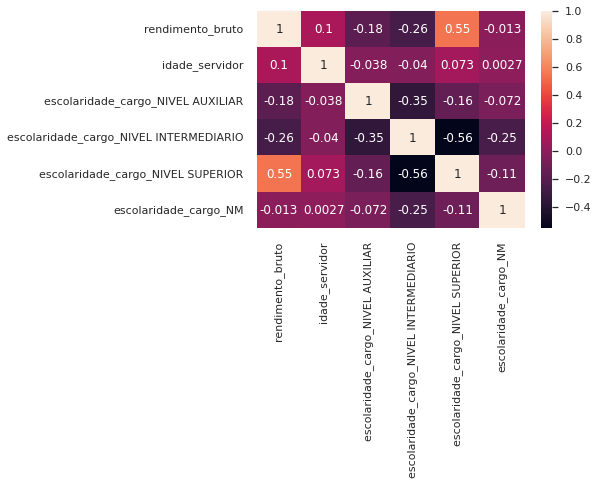

In [40]:
sns.heatmap( dataset3.corr (), annot = True )

In [43]:
sns.scatterplot(data = dataset3, x = "rendimento_bruto", y = "escolaridade_cargo")

ValueError: ignored

In [ ]:
#Realizar um modelo de aprendizado de máquina para prever quais variáveis impactam no modelo de um benefício suspenso ('pagamento_suspenso')



'''Análise de varios algoritmos de classificação'''
um_folds = 10
resultados = []
nomes = []
modelos = []

modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RNN',MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)))

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle=True, random_state=1)
    cv_results = cross_val_score(modelo, X_res, y_res, cv = kfold, scoring = 'accuracy')
    cm_results = cross_val_predict(modelo,X_res,y_res,cv = kfold)
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()




In [52]:


profile = ProfileReport(dataset, title = "Relatório", html = {"style":{"full_width": True}})
profile.to_file(output_file = "/content/Relatório Base de Dados HTML")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]